In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyFAI
import os
from PIL import Image
import scipy.integrate as integrate
# import tifffile as tif
# %matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
#### Kohei data path - the .tiffs for the XRD and VISAR are created here /work/kmiyanishi/userdata/2025b/fitzgerald2025b
experiment_path = "/work/kmiyanishi/userdata/2025b/fitzgerald2025b/renamed_files"
test_path = "test_files"
print(f"Path exists: {os.path.exists(experiment_path)}")

# two XRD pathways fpd1 & fpd2, not sure which one the .tiffs will appear in 
fpd1_folderpath = os.path.join(experiment_path, 'fpd1')

fpd1 = ''

Path exists: True


In [15]:
def plot(fpd1_CAKE, fpd1_INT):
    # This is all to plot the below graphs
    plt.figure(figsize = (25, 8))
    # Plot of the cakes
    plt.subplot(121)
    plt.pcolormesh(fpd1_CAKE.radial, fpd1_CAKE.azimuthal, np.log10(fpd1_CAKE.intensity), cmap = 'jet')
    plt.xlabel('Theta (Degrees) or Q ($\\AA^{-1}$)')
    plt.ylabel('Phi (Degrees)')
    
    # Plot of the 1D lineouts
    plt.subplot(122)
    plt.plot(fpd1_INT.radial, fpd1_INT.intensity)
    # plt.semilogy()
    plt.xlabel('Theta (Degrees) or Q ($\\AA^{-1}$)')
    plt.ylabel('Arbitrary Intensity')
    # plt.xlim(15, 20)
    plt.show()

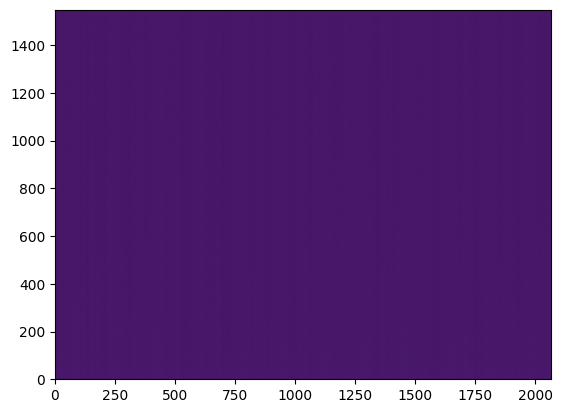

In [31]:
dark_runNo = 1620724
number_of_darks = 1.0

dark_path_fpd1 = os.path.join(fpd1_folderpath, f"{dark_runNo}_fpd1-b.tif")
dark_im_fpd1 = np.array(Image.open(dark_path_fpd1), dtype=float) / number_of_darks

plt.pcolormesh(dark_im_fpd1)

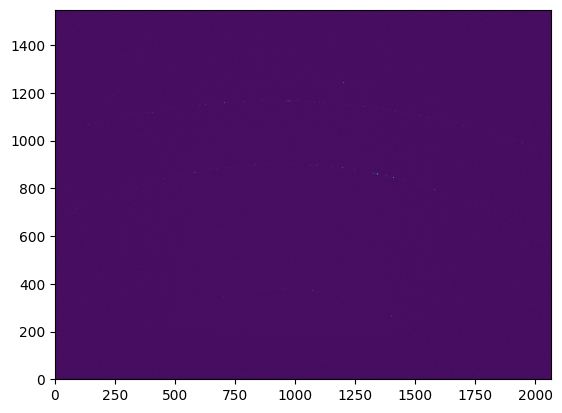

In [39]:
#run = 1620725
run = dark_runNo
number_of_shots = 1

file_path_fpd1 = os.path.join(fpd1_folderpath, f"{run}_fpd1.tif")

#file_path_fpd1 = "test_files/1437700_fpd1.tif"

im_fpd1 = np.array(Image.open(file_path_fpd1), dtype=float)

if dark_runNo is not None:
    im_fpd1 = im_fpd1 - dark_im_fpd1

plt.pcolormesh(im_fpd1)

In [40]:
# From here should be the same
# fpd1_map = np.load('fpd1_map.npy')
fpd1_map = np.ones_like(im_fpd1)

# fpd1_mask = np.load('fpd1_mask.npy')
fpd1_mask = np.zeros_like(im_fpd1)

/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


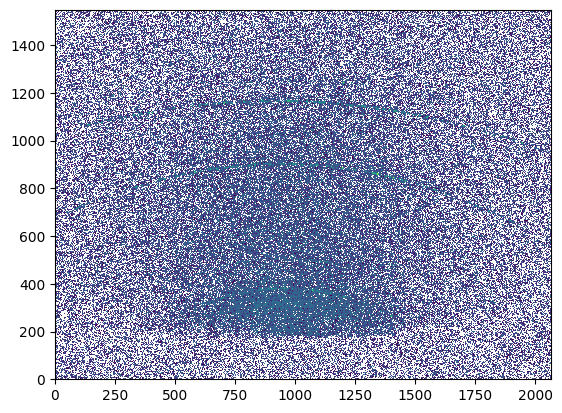

In [41]:
plt.pcolormesh(np.log10(im_fpd1))

In [42]:
fpd1_PONI = pyFAI.load('1437700_fpd1_celine.poni')
# fpd1_PONI = pyFAI.load('fpd1_r35.poni')  # Put new poni files in here

In [43]:
# Number of scattering angle bins
npt_rad = 2000
# Number of azimuthal angle bins
npt_azim = 360
# Range for the integration in 2 theta or A^-1
radial_range = [15, 85]  # I suggest [0, 90] or [0,15] when changing units
# Range for the integration in azimuth
azim_range = [15, 160]
# Units of the integration    Either "2th_deg" or "q_A^-1"  You need to change the radial rangne values as well as the string below
units="2th_deg"

In [44]:
# fpd1_INT = fpd1_PONI.medfilt1d(im_fpd1 * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)#, variance = np.ones_like(VAREX_1[:, :, 1])*1e4)
# 
# plt.figure(figsize=(15,10))
# plt.plot(fpd1_INT.radial, fpd1_INT.intensity)
# plt.show()

/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


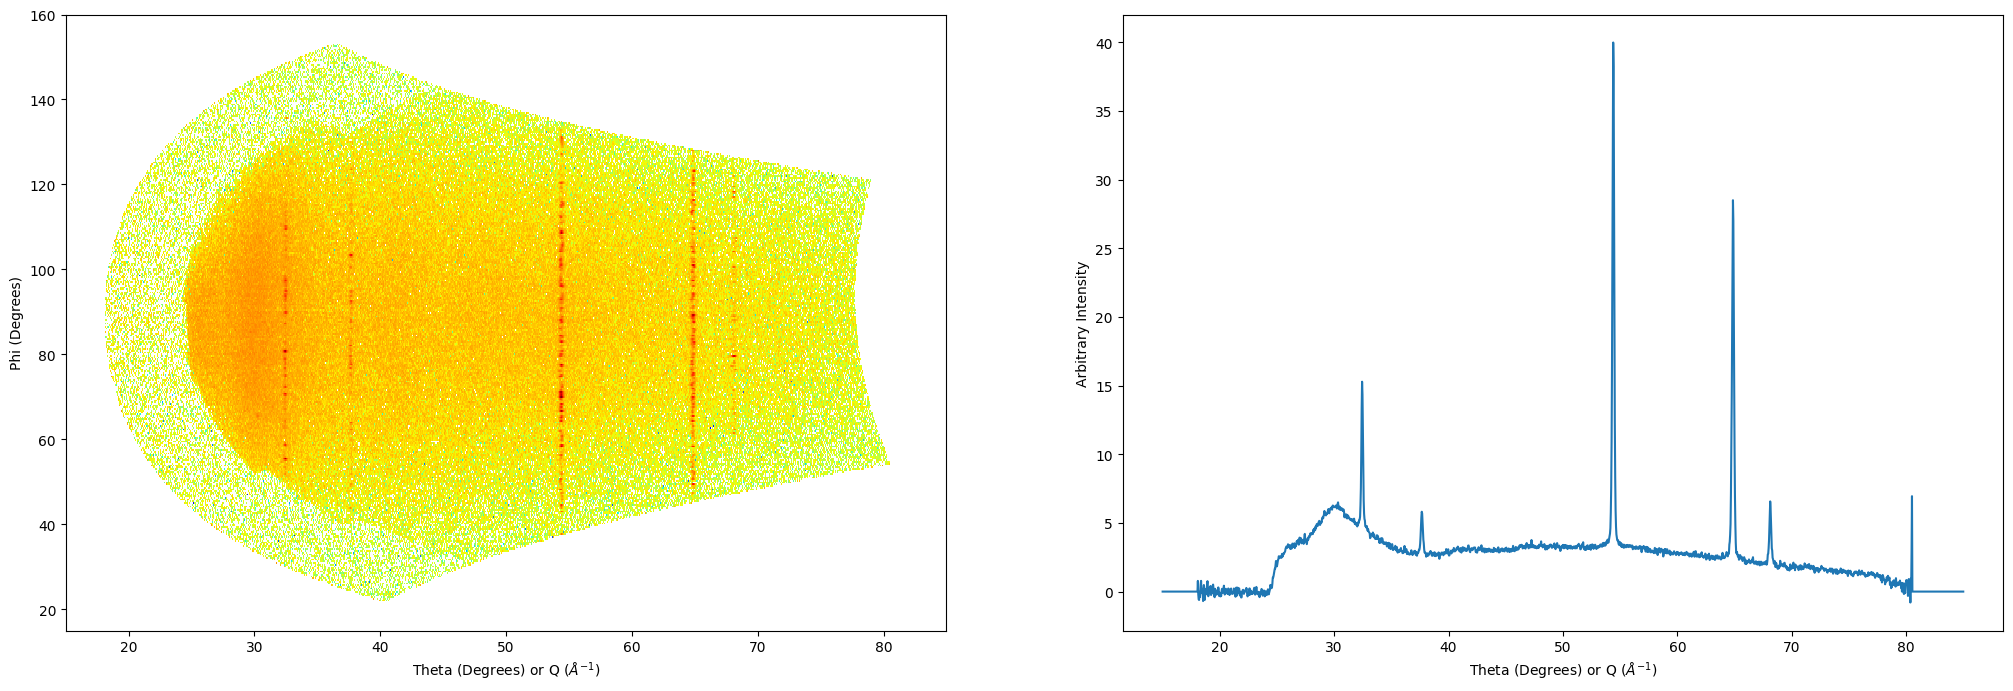

In [45]:
# Plots the cake and the 1D lineout
if number_of_shots <= 1:
    # pyFAI integration for VAREX 1
    fpd1_CAKE = fpd1_PONI.integrate2d_ng(im_fpd1 * fpd1_map, npt_rad, npt_azim, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=None, unit=units, mask=fpd1_mask)
    fpd1_INT = fpd1_PONI.integrate1d_ng(im_fpd1 * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=None, unit=units, mask=fpd1_mask)
    
    plot(fpd1_CAKE, fpd1_INT)

else:
    for i in range(0, number_of_shots):
        # pyFAI integration for VAREX 1
        fpd1_CAKE = fpd1_PONI.integrate2d_ng(im_fpd1[:, :, i] * fpd1_map, npt_rad, npt_azim, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=1, unit=units, mask=fpd1_mask)
        fpd1_INT = fpd1_PONI.integrate1d_ng(im_fpd1[:, :, i] * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=1, unit=units, mask=fpd1_mask)
        
        plot(fpd1_CAKE, fpd1_INT)
    print('Done! :)')